In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [25]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [26]:
df.isnull().sum().sum()

0

In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.drop(['CustomerID'], axis = 1, inplace = True)

In [30]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

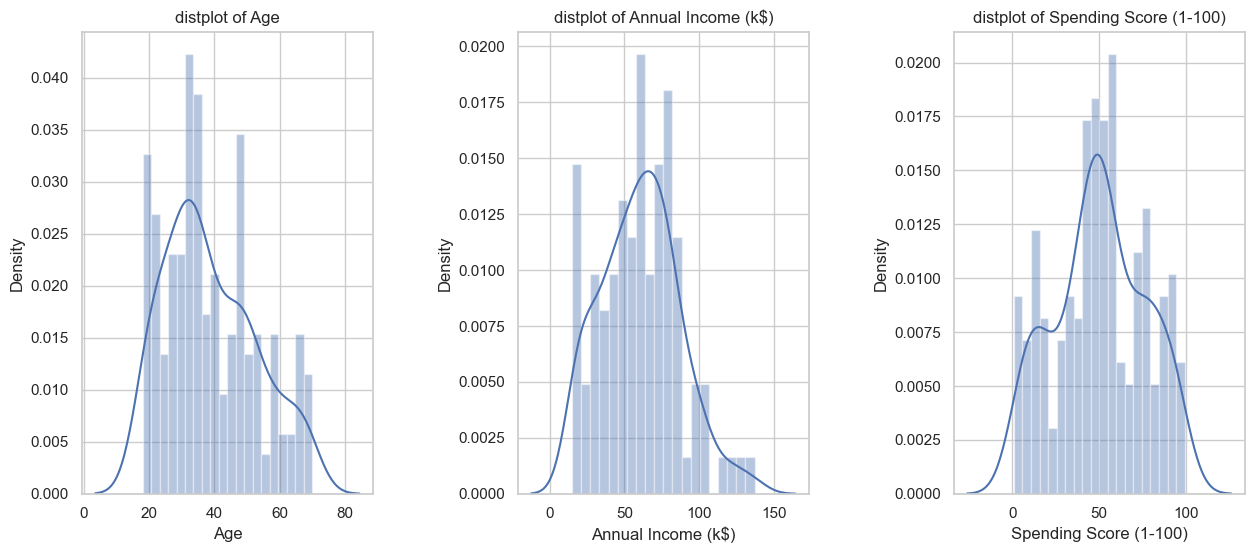

In [31]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('distplot of {}'. format(x))
plt.show()

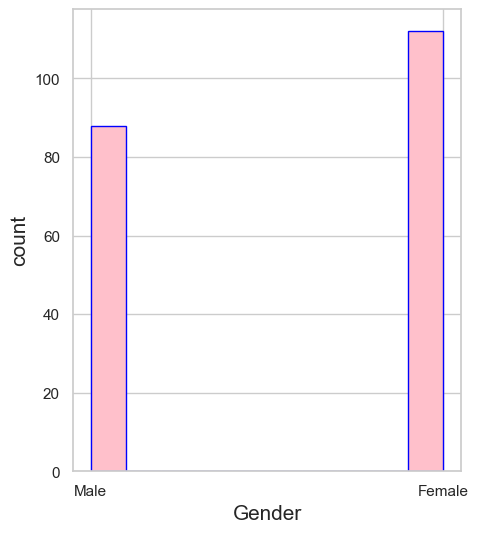

In [32]:
plt.figure(figsize = (5, 6))
plt.hist(df['Gender'], color = 'pink', ec = 'blue')
plt.xlabel('Gender', size = 15)
plt.ylabel('count', size = 15)
plt.show()

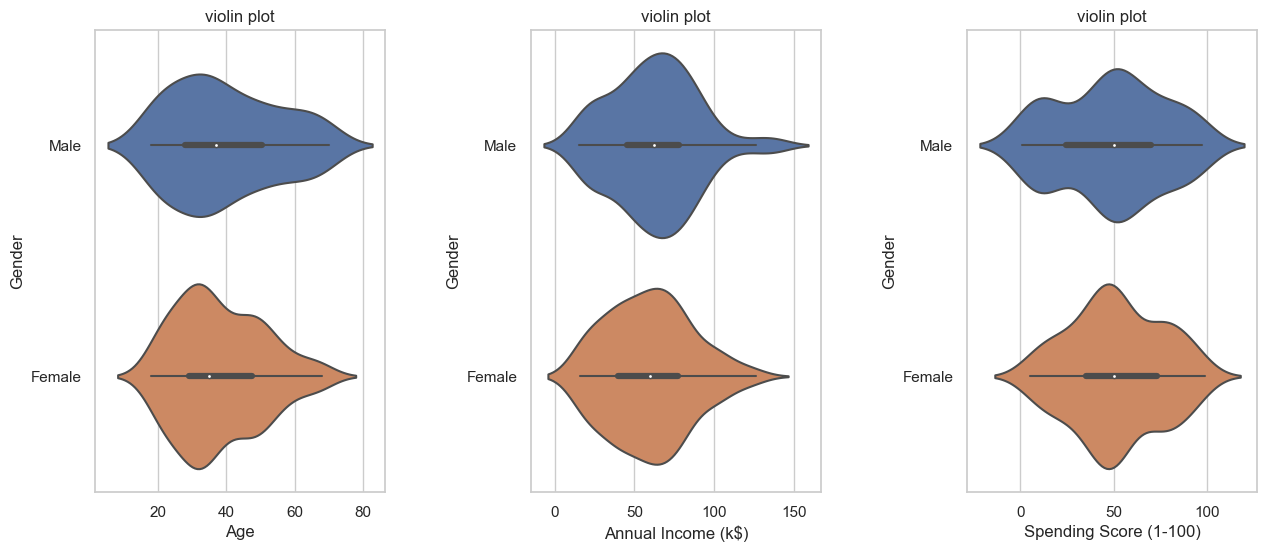

In [33]:
plt.figure(1, figsize = (15, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style = 'whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df)
    plt.ylabel('Gender')
    plt.title('violin plot')
plt.show()

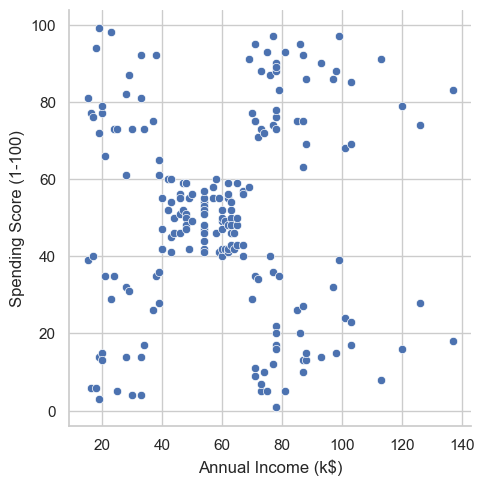

In [34]:
sns.relplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


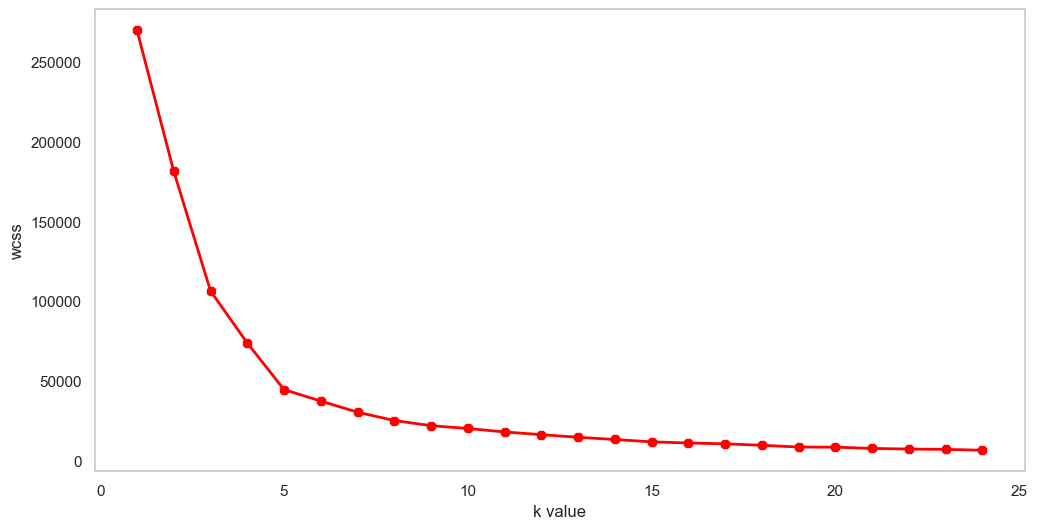

In [35]:
x1 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

wcss = []

for k in range(1, 25):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 51)
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12, 6))
plt.grid()
plt.plot(range(1, 25), wcss, linewidth = 2, color = 'red', marker = '8')
plt.xlabel('k value')
plt.ylabel('wcss')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 51)

label = kmeans.fit_predict(x1)

print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [37]:
print(kmeans.cluster_centers_)

[[88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [38]:
x1[label== 0, 0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [39]:
x1[label==0, 1]

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

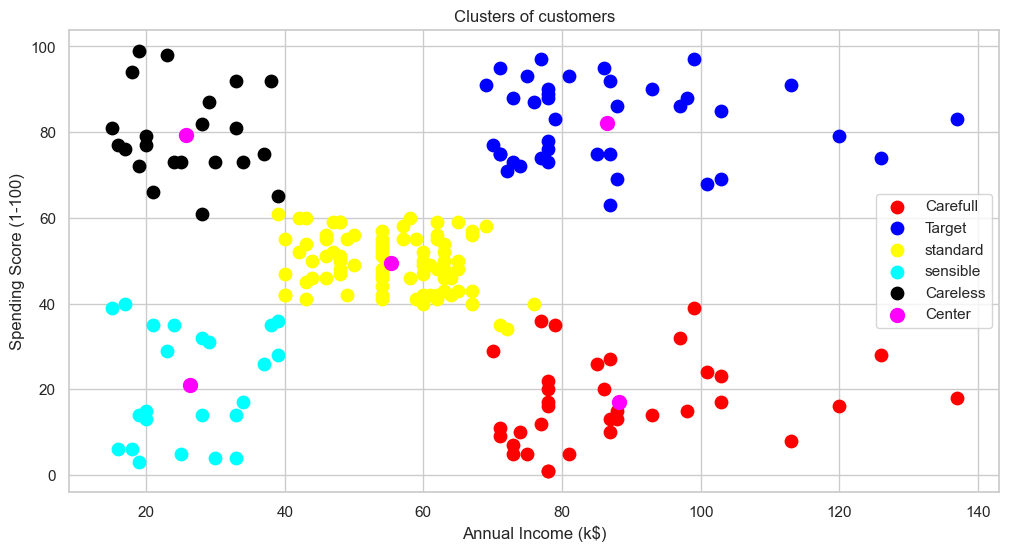

In [40]:
plt.figure(figsize = (12, 6))

plt.scatter(x1[label== 0,0], x1[label==0,1], s=80, c='red',label='Carefull')
plt.scatter(x1[label== 1,0], x1[label==1,1], s=80, c='blue',label='Target')
plt.scatter(x1[label== 2,0], x1[label==2,1], s=80, c='yellow',label='standard')
plt.scatter(x1[label== 3,0], x1[label==3,1], s=80, c='cyan',label='sensible')
plt.scatter(x1[label== 4,0], x1[label==4,1], s=80, c='black',label='Careless')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s=100, c='magenta', label='Center')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

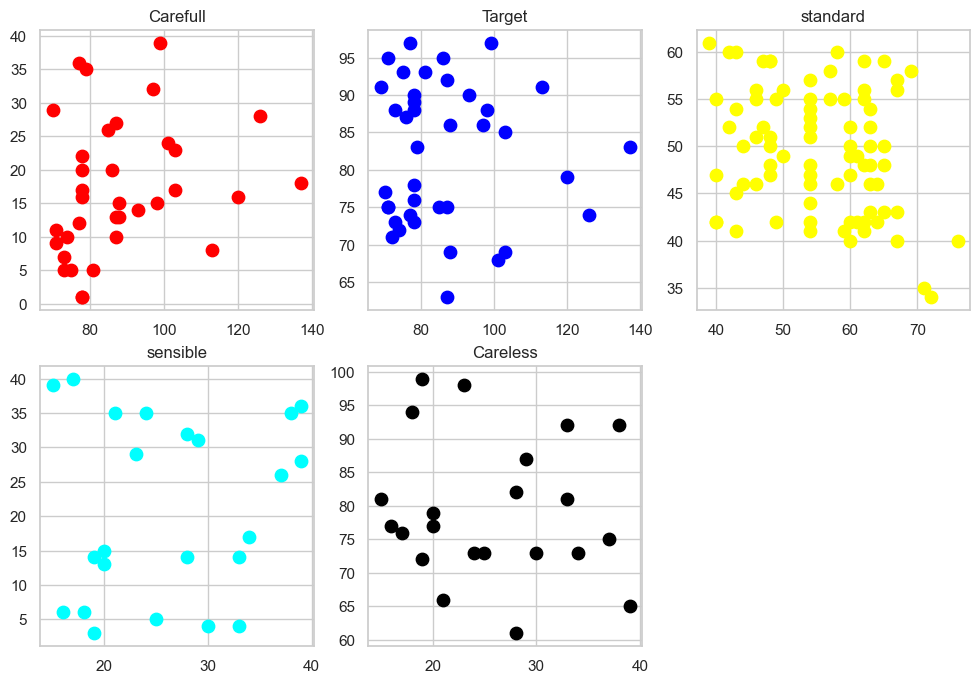

In [41]:
plt.figure(figsize = (12, 8))

plt.subplot(2, 3, 1)
plt.scatter(x1[label== 0,0], x1[label==0,1], s=80, c='red')
plt.title('Carefull')

plt.subplot(2, 3, 2)
plt.scatter(x1[label== 1,0], x1[label==1,1], s=80, c='blue')
plt.title('Target')

plt.subplot(2, 3, 3)
plt.scatter(x1[label== 2,0], x1[label==2,1], s=80, c='yellow')
plt.title('standard')

plt.subplot(2, 3, 4)
plt.scatter(x1[label== 3,0], x1[label==3,1], s=80, c='cyan')
plt.title('sensible')

plt.subplot(2, 3, 5)
plt.scatter(x1[label== 4,0], x1[label==4,1], s=80, c='black')
plt.title('Careless')


plt.show()

In [42]:
df['group'] = label
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),group
0,Male,19,15,39,3
1,Male,21,15,81,4
2,Female,20,16,6,3
3,Female,23,16,77,4
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


In [43]:
df1 = df['Age']
df2 = df['Annual Income (k$)']
df3 = df['Spending Score (1-100)']

df4 = df2 - df3
df4

0      -24
1      -66
2       10
3      -61
4      -23
      ... 
195     41
196     98
197     52
198    119
199     54
Length: 200, dtype: int64